TODO:
- Create a title
- Review text and content
- Include dataset sources

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
dete_survey = pd.read_csv("dete_survey.csv", na_values='Not Stated')
print(dete_survey.head())
print(dete_survey.info())

   ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

There are a couple of columns with just a few missing values, where we would probably end up droping rows and there are a couple of columns with most of their values missing, probably due to some sort of issue.

In [119]:
tafe_survey = pd.read_csv("tafe_survey.csv")
print(tafe_survey.head(2))
print(tafe_survey.info())

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0  

In [120]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

There are a couple of columns with just a few missing values, where we would probably end up droping rows and there are a couple of columns with nearly half of their values missing, probably due to some sort of issue.

In [121]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

We can first make the following observations:

- The `dete_survey` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as `NaN`.
- Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues. We used the `pd.read_csv()` function to specify values that should be represented as `NaN`. We used this function to fix the missing values first. Then, we dropped columns we know we don't need for our analysis.

In [122]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [123]:
tafe_survey_updated = tafe_survey_updated.rename(columns={
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
})
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [124]:
print(dete_survey_updated.head(3))
print(tafe_survey_updated.head(3))

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   

   role_start_date         position classification          region  \
0           2004.0   Public Servant        A01-A04  Central Office   
1              NaN   Public Servant        AO5-AO7  Central Office   
2           2011.0  Schools Officer            NaN  Central Office   

                       business_unit    employment_status  ...   \
0  Corporate Strategy and Peformance  Permanent Full-time  ...    
1  Corporate Strategy and Peformance  Permanent Full-time  ...    
2               Education Queensland  Permanent Full-time  ...    

   work_life_balance  workload  none_of_the_above  gender          age  \
0              False     False               True    Male        56-60   
1              Fa

Each dataframe contains many of the same columns, but the column names are different. Because we eventually want to combine them, we'll have to standardize the column names.

We renamed the remaining columns in the `dete_survey_updated` dataframe using the following criteria:

- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores (`_`).

We used the `DataFrame.rename()` method to update the columns below in `tafe_survey_updated`. The rest of the column names will be handled later.

- `'Record ID': 'id'`
- `'CESSATION YEAR': 'cease_date'`
- `'Reason for ceasing employment': 'separationtype'`
- `'Gender. What is your Gender?': 'gender'`
- `'CurrentAge. Current Age': 'age'`
- `'Employment Type. Employment Type': 'employment_status'`
- ` 'Classification. Classification': 'position'`
- ` 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'`


In [125]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [126]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [127]:
cols = ['Resignation-Other reasons',
        'Resignation-Other employer',
        'Resignation-Move overseas/interstate',
       ]

dete_resignations = dete_survey_updated[
                dete_survey_updated['separationtype'].isin(cols)
                ].copy()

tafe_resignations = tafe_survey_updated[
                tafe_survey_updated['separationtype']=='Resignation'
                ].copy()

We copied the dataframes to include only rows for employees who have resigned because this is what we are analysing.

In [128]:
print(dete_resignations['cease_date'].value_counts(ascending=False))

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64


In [129]:
pattern = r"([1-2][0-9]{3})"
years = dete_resignations['cease_date'].str.extract(pattern, expand=False).astype(float)
dete_resignations['cease_year'] = years

In [130]:
print(dete_resignations['dete_start_date'].value_counts(ascending=False))

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64


In [131]:
print(tafe_resignations['cease_date'].value_counts(ascending=False))

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


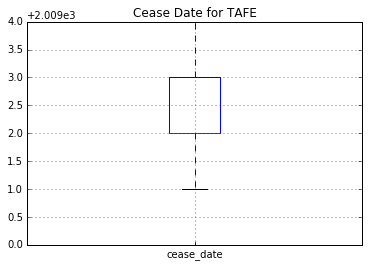

In [132]:
# fig = plt.figure()
# ax1 = fig.add_subplot(1, 3, 1)
# ax2 = fig.add_subplot(1, 3, 2)
# ax3 = fig.add_subplot(1, 3, 3)
# ax1.boxplot(tafe_resignations['cease_date'].values)
# plt.show()

ax = tafe_resignations.boxplot(column='cease_date')
ax.set_title('Cease Date for TAFE')

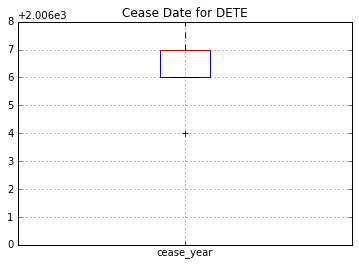

In [133]:
ax2 = dete_resignations.boxplot(column='cease_year')
ax2.set_title('Cease Date for DETE')

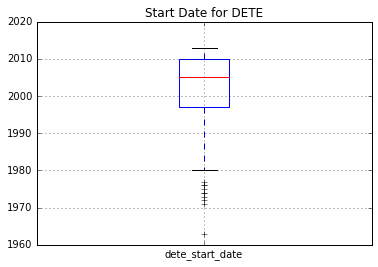

In [134]:
ax3 = dete_resignations.boxplot(column='dete_start_date')
ax3.set_title('Start Date for DETE')

Include findings here ---> <---

In [135]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,cease_year
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,2012.0
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,2012.0
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,2012.0
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,2012.0
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,2012.0


In [136]:
dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']

In [137]:
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

We created a new columns called `institute_service` in the `dete_resignations` dataframe to calculate the length of time the employee spent in their workplace.

In [138]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [139]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [140]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == "-":
        return False
    else:
        return True

In [141]:
cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[cols].applymap(update_vals).any(axis=1, skipna=False)


In [142]:
cols2 = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload',
    ]

# print(dete_resignations[cols2[0]].value_counts())
# print(dete_resignations[cols2[1]].value_counts())
# print(dete_resignations[cols2[2]].value_counts())
# print(dete_resignations[cols2[3]].value_counts())
# print(dete_resignations[cols2[4]].value_counts())
# print(dete_resignations[cols2[5]].value_counts())
# print(dete_resignations[cols2[6]].value_counts())
# print(dete_resignations[cols2[7]].value_counts())
# print(dete_resignations[cols2[8]].value_counts())

dete_resignations['dissatisfied']=dete_resignations[cols2].any(axis=1)

In [143]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Include remarks here --> <--

In [144]:
dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"

In [145]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.notnull().sum().sort_values()

torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
dete_start_date                                                              283
LengthofServiceCurrent. Length of Service at current workplace (in years)    290
cease_year                                                                   300
career_move_to_public_sector

In [146]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()
combined_updated.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute', 'institute_service', 'position', 'separationtype'],
      dtype='object')

Include explanation --> <--

In [147]:
pattern = r'(\d+)'
combined_updated['institute_service_up']= combined_updated['institute_service'].astype('str').str.extract(pattern, expand=False).astype(float)
# combined_updated.columns

In [148]:
def career_stage(year_value):
    year_value = float(year_value)
    if year_value >= 11:
        return "Veteran"
    elif year_value >= 7:
        return "Established"
    elif year_value >= 3:
        return "Experienced"
    elif pd.isnull(year_value):
        return np.nan
    else:
        return "New"

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_stage)

--> explanation here <--

In [149]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [151]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [153]:
pv_cu = combined_updated.pivot_table('dissatisfied', 'service_cat')

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


In [154]:
pv_cu.plot(kind='bar')

NameError: name 'pv_cu' is not defined

--> Include observa